In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=42907a08e1d5bd8f57fa1e4e09c011f3fc66ad24c6f98d4ee63ce5da6a3d206a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Fire DF").getOrCreate()

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
from pyspark.sql.functions import*
from pyspark.sql.types import*

In [6]:
df=spark.read.csv("drive/My Drive/BDA-SPARK/sf-fire-calls.csv",header=True,inferSchema=True) #inferSchema identifies itself about datatype
df.show()
df.printSchema()

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+
|CallNumber|UnitID|IncidentNumber|        CallType|  CallDate| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+

In [7]:
#to create dataframe with required columns
df1 = df.select("CallType","CallDate","City","Zipcode","Neighborhood","Delay")
df1.show()

+----------------+----------+----+-------+--------------------+---------+
|        CallType|  CallDate|City|Zipcode|        Neighborhood|    Delay|
+----------------+----------+----+-------+--------------------+---------+
|  Structure Fire|01/11/2002|  SF|  94109|     Pacific Heights|     2.95|
|Medical Incident|01/11/2002|  SF|  94124|Bayview Hunters P...|      4.7|
|Medical Incident|01/11/2002|  SF|  94102|          Tenderloin|2.4333334|
|    Vehicle Fire|01/11/2002|  SF|  94110|      Bernal Heights|      1.5|
|          Alarms|01/11/2002|  SF|  94109|    Western Addition|3.4833333|
|  Structure Fire|01/11/2002|  SF|  94105|Financial Distric...|     1.75|
|          Alarms|01/11/2002|  SF|  94112|Oceanview/Merced/...|2.7166667|
|          Alarms|01/11/2002|  SF|  94102|          Tenderloin|1.7833333|
|Medical Incident|01/11/2002|  SF|  94115|           Japantown|1.5166667|
|Medical Incident|01/11/2002|  SF|  94114| Castro/Upper Market|2.7666667|
|Medical Incident|01/11/2002|  SF|  94

In [8]:
#To get date in required format->add new column with reference from original date column
df2 = df1.withColumn('Date',to_date(col('CallDate'),'MM/dd/yyyy'))
df2.show(4)

+----------------+----------+----+-------+--------------------+---------+----------+
|        CallType|  CallDate|City|Zipcode|        Neighborhood|    Delay|      Date|
+----------------+----------+----+-------+--------------------+---------+----------+
|  Structure Fire|01/11/2002|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|
|Medical Incident|01/11/2002|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|
|Medical Incident|01/11/2002|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|
|    Vehicle Fire|01/11/2002|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|
+----------------+----------+----+-------+--------------------+---------+----------+
only showing top 4 rows



In [9]:
#to remove 2nd column
df2 = df1.withColumn("Date",to_date(col('CallDate'),'MM/dd/yyyy')).drop('CallDate')
df2.show()

+----------------+----+-------+--------------------+---------+----------+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|
+----------------+----+-------+--------------------+---------+----------+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|
|          Alarms|  SF|  94102|          Tenderloin|1.7833333|2002-01-11|
|Medical Incident|  SF|  94115|           Japantown|1.5166667|2002-01-11|
|Medical Incident|  SF|  94114| Castro/Upper Market|2.7666667|2002-01-11|
|Medical Incident|  SF|  94110|       

In [10]:
df3 = df2.withColumn("Year",year(col('Date')))\
    .withColumn("Month",month(col('Date')))\
    .withColumn("Week",weekofyear(col('Date')))\
    .withColumn('Day',dayofmonth(col('Date')))
df3.show(30)
#\-> is to make it visible clear throughmultiple lines instead of single line

+--------------------+----+-------+--------------------+---------+----------+----+-----+----+---+
|            CallType|City|Zipcode|        Neighborhood|    Delay|      Date|Year|Month|Week|Day|
+--------------------+----+-------+--------------------+---------+----------+----+-----+----+---+
|      Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|2002|    1|   2| 11|
|    Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|2002|    1|   2| 11|
|    Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|2002|    1|   2| 11|
|        Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|2002|    1|   2| 11|
|              Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|2002|    1|   2| 11|
|      Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|2002|    1|   2| 11|
|              Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|2002|    1|   2| 11|
|              Alarm

In [11]:
#consider month and if particular month then estimate the season
#UDF->user defined function
# udfSeasons=udf(mapSeason,StringType())
# df3.withColumn('Season',udfSeasons(col('Month'))) ->based on month tells which season
def mapSeason(data):
  if 2 < data < 6:
    return 'Spring'
  elif 5 < data <9:
    return 'Summer'
  elif 8 < data < 12:
    return 'Autumn'
  else:
    return 'Winter'
seasonUDF=udf(mapSeason,StringType())
clean_df=df3.withColumn('Season',seasonUDF(col('Month')))
clean_df.show()

+----------------+----+-------+--------------------+---------+----------+----+-----+----+---+------+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|Year|Month|Week|Day|Season|
+----------------+----+-------+--------------------+---------+----------+----+-----+----+---+------+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|2002|    1|   2| 11|Winter|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|2002|    1|   2| 11|Winter|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|2002|    1|   2| 11|Winter|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|2002|    1|   2| 11|Winter|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|2002|    1|   2| 11|Winter|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|2002|    1|   2| 11|Winter|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|2002|    1|   2| 1

In [12]:
# 1.Get yearly count of fire calls
clean_df.select('Year').groupBy('Year').count().orderBy('Year',ascending=True).show()

+----+-----+
|Year|count|
+----+-----+
|2000| 5459|
|2001| 7713|
|2002| 8090|
|2003| 8499|
|2004| 8283|
|2005| 8282|
|2006| 8174|
|2007| 8255|
|2008| 8869|
|2009| 8789|
|2010| 9341|
|2011| 9735|
|2012| 9674|
|2013|10020|
|2014|10775|
|2015|11458|
|2016|11609|
|2017|12135|
|2018|10136|
+----+-----+



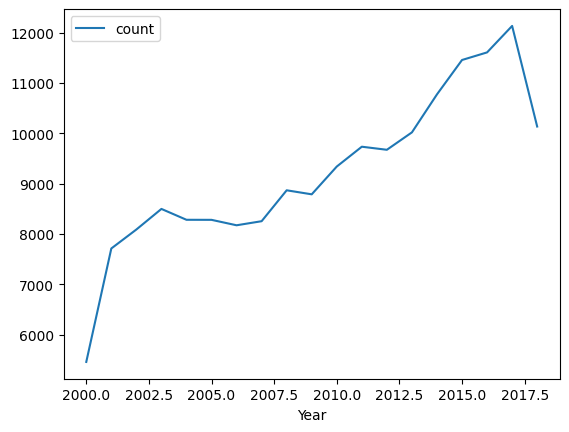

In [13]:
#pyspark to pandas dataframe
panda_df=clean_df.select('Year')\
.groupBy('Year').count()\
.orderBy('Year',ascending=True).toPandas()

panda_df.plot.line(x='Year',y='count')
plt.show()

In [14]:
#2. What were all the different types of fire calls in 2018?
clean_df.select('CallType').where(col('Year')==2018).distinct().show(truncate=False) #value may contain 50 characters but wont show all.
#  So if we want to see all the values of rows then put truncate=false

+-------------------------------+
|CallType                       |
+-------------------------------+
|Elevator / Escalator Rescue    |
|Alarms                         |
|Odor (Strange / Unknown)       |
|Citizen Assist / Service Call  |
|HazMat                         |
|Vehicle Fire                   |
|Other                          |
|Outside Fire                   |
|Traffic Collision              |
|Assist Police                  |
|Gas Leak (Natural and LP Gases)|
|Water Rescue                   |
|Electrical Hazard              |
|Structure Fire                 |
|Medical Incident               |
|Fuel Spill                     |
|Smoke Investigation (Outside)  |
|Train / Rail Incident          |
|Explosion                      |
|Suspicious Package             |
+-------------------------------+



In [15]:
# 3.Which week in the year in 2018 had the most fire calls?
clean_df.select('Week')\
.where(col('Year')==2018)\
.groupBy('Week')\
.count()\
.orderBy('count',ascending=False).collect()[0][0]

22

In [16]:
max_month=clean_df.select('Week')\
.where(col('Year')==2018)\
.groupBy('Week')\
.count()
max_month.select('Week','count').filter(col('count')==max_month.agg({'count':'max'}).collect()[0][0]).collect()[0][0]

22

In [17]:
# 4. Get monthly count of fire calls based on year
clean_df.select('Month','Year').groupBy('Month','Year').count().orderBy('Year',ascending=False).show()

+-----+----+-----+
|Month|Year|count|
+-----+----+-----+
|    3|2018| 1029|
|   11|2018|  199|
|    2|2018|  919|
|   10|2018| 1068|
|    1|2018| 1007|
|    9|2018|  951|
|    7|2018|  974|
|    6|2018|  974|
|    4|2018|  947|
|    8|2018| 1021|
|    5|2018| 1047|
|    1|2017| 1105|
|    3|2017| 1066|
|    6|2017|  970|
|    2|2017|  919|
|    4|2017|  996|
|    5|2017| 1018|
|    7|2017|  963|
|    8|2017| 1029|
|   11|2017|  975|
+-----+----+-----+
only showing top 20 rows



In [18]:
# 5. Give monthly report of fire call types for selected year
clean_df.select('Year','CallType','Month').filter(col('Year') == 2018).filter(col('Month') == 11).groupBy('Year','Month','Calltype').count().orderBy('Year',acsending = True).show(truncate = False)

+----+-----+-------------------------------+-----+
|Year|Month|Calltype                       |count|
+----+-----+-------------------------------+-----+
|2018|11   |Alarms                         |24   |
|2018|11   |Traffic Collision              |8    |
|2018|11   |Odor (Strange / Unknown)       |1    |
|2018|11   |Outside Fire                   |11   |
|2018|11   |Citizen Assist / Service Call  |5    |
|2018|11   |Gas Leak (Natural and LP Gases)|1    |
|2018|11   |Medical Incident               |135  |
|2018|11   |Other                          |3    |
|2018|11   |Structure Fire                 |11   |
+----+-----+-------------------------------+-----+



In [19]:
# 6.Give top five fire call types for every season of selected year (seasons are like Spring, summer, fall winter etc)
from pyspark.sql.window import Window

season_count = clean_df.select('CallType','Season')\
                .filter(col('Year') == 2014)\
                .groupBy('Season','CallType')\
                .count()\
                .withColumn('Rank',dense_rank().over(Window.partitionBy('Season').orderBy(col('count').desc())))\
                .orderBy('Season','Rank',ascending = [1,1])\
                .filter(col('Rank')<6)
season_count.show()

+------+--------------------+-----+----+
|Season|            CallType|count|Rank|
+------+--------------------+-----+----+
|Autumn|    Medical Incident| 1832|   1|
|Autumn|      Structure Fire|  319|   2|
|Autumn|              Alarms|  314|   3|
|Autumn|   Traffic Collision|  120|   4|
|Autumn|Citizen Assist / ...|   26|   5|
|Spring|    Medical Incident| 1801|   1|
|Spring|      Structure Fire|  314|   2|
|Spring|              Alarms|  281|   3|
|Spring|   Traffic Collision|  112|   4|
|Spring|Citizen Assist / ...|   36|   5|
|Summer|    Medical Incident| 1770|   1|
|Summer|      Structure Fire|  322|   2|
|Summer|              Alarms|  269|   3|
|Summer|   Traffic Collision|  112|   4|
|Summer|        Outside Fire|   37|   5|
|Winter|    Medical Incident| 1773|   1|
|Winter|              Alarms|  337|   2|
|Winter|      Structure Fire|  310|   3|
|Winter|   Traffic Collision|  111|   4|
|Winter|Citizen Assist / ...|   36|   5|
+------+--------------------+-----+----+



In [20]:
# 7. Whether fire type calls are seasonal?
clean_df.select('CallType','Season').groupBy('CallType','Season').count().orderBy('CallType').show(truncate = False)

+-----------------------------------+------+-----+
|CallType                           |Season|count|
+-----------------------------------+------+-----+
|Administrative                     |Winter|1    |
|Administrative                     |Spring|1    |
|Administrative                     |Autumn|1    |
|Aircraft Emergency                 |Spring|6    |
|Aircraft Emergency                 |Winter|10   |
|Aircraft Emergency                 |Summer|10   |
|Aircraft Emergency                 |Autumn|10   |
|Alarms                             |Summer|4910 |
|Alarms                             |Winter|4875 |
|Alarms                             |Autumn|4980 |
|Alarms                             |Spring|4641 |
|Assist Police                      |Spring|9    |
|Assist Police                      |Winter|6    |
|Assist Police                      |Autumn|6    |
|Assist Police                      |Summer|14   |
|Citizen Assist / Service Call      |Summer|669  |
|Citizen Assist / Service Call 

In [21]:
# 8. What months within the year 2018 saw the highest number of fire calls?
max_month = clean_df.select('CallType','Month').where(col('Year') == 2018).groupBy('Month').count().orderBy('Month',acsending = True)
max_month.select('Month','count').filter(col('count') == max_month.agg({'count':'max'}).collect()[0][0]).collect()[0][0]

10

In [22]:
# 9.Find which type of fire call is major calltype in each year
calltype = clean_df.select('CallType','Year').groupBy('CallType','Year').count().orderBy('CallType')
calltype.groupBy('Year').agg(max('CallType')).show(n = 100, truncate = False)

+----+----------------------+
|Year|max(CallType)         |
+----+----------------------+
|2000|Water Rescue          |
|2001|Water Rescue          |
|2002|Water Rescue          |
|2003|Water Rescue          |
|2004|Water Rescue          |
|2005|Water Rescue          |
|2006|Watercraft in Distress|
|2007|Watercraft in Distress|
|2008|Watercraft in Distress|
|2009|Watercraft in Distress|
|2010|Water Rescue          |
|2011|Watercraft in Distress|
|2012|Watercraft in Distress|
|2013|Watercraft in Distress|
|2014|Watercraft in Distress|
|2015|Watercraft in Distress|
|2016|Watercraft in Distress|
|2017|Watercraft in Distress|
|2018|Water Rescue          |
+----+----------------------+



In [23]:
# 10. Find out average delay in response for each call type
calltype = clean_df.groupBy("CallType",'Delay').count().orderBy('CallType')
calltype.groupBy('CallType').agg(avg('Delay').alias('delaycount')).orderBy('CallType').show(n = 30,truncate = False)

+--------------------------------------------+------------------+
|CallType                                    |delaycount        |
+--------------------------------------------+------------------+
|Administrative                              |12.261111333333332|
|Aircraft Emergency                          |3.8376190485714283|
|Alarms                                      |10.505849715658089|
|Assist Police                               |26.981903994285716|
|Citizen Assist / Service Call               |9.577430545520835 |
|Confined Space / Structure Collapse         |6.915384576923078 |
|Electrical Hazard                           |6.374197545925923 |
|Elevator / Escalator Rescue                 |5.034573005247933 |
|Explosion                                   |4.215384632051284 |
|Extrication / Entrapped (Machinery, Vehicle)|4.391666678571428 |
|Fuel Spill                                  |5.921854309933774 |
|Gas Leak (Natural and LP Gases)             |5.733872698381874 |
|HazMat   

In [25]:
# 11. Find which calltype has maximum average delay time
calltype = clean_df.groupBy("CallType",'Delay').count().orderBy('CallType')
call = calltype.groupBy('CallType').agg(avg('Delay').alias('delaycount'))
call.select('CallType','delaycount').filter(col('delaycount') == call.agg({'delaycount':'max'}).collect()[0][0]).collect()[0][0]

'Mutual Aid / Assist Outside Agency'

In [26]:
# 12. Which neighborhood in San Francisco generated the most fire calls in 2018?
neigh = clean_df.select('Neighborhood','City','CallType')\
  .filter(col('Year') == 2018).filter(col('City') == 'San Francisco').groupBy('Neighborhood').count()
neigh.select('Neighborhood').filter(col('count') == neigh.agg({'count':'max'}).collect()[0][0]).collect()[0][0]

'Tenderloin'

In [27]:
#13. Which neighborhoods had the worst response times to fire calls in 2018?
neigh = clean_df.select('Neighborhood','Delay')\
  .filter(col('Year') == 2018).groupBy('Neighborhood','Delay').count()
neigh.groupBy('Neighborhood').agg(avg('Delay').alias('AvgDelay')).orderBy('AvgDelay',ascending = False).show()

+--------------------+------------------+
|        Neighborhood|          AvgDelay|
+--------------------+------------------+
|           Chinatown| 7.141891841891895|
|          Tenderloin| 6.905165944909502|
|Financial Distric...| 6.164299488231879|
|            Presidio| 6.002459014098358|
|Bayview Hunters P...| 5.889281729124582|
|     Treasure Island| 5.516183584057972|
|     South of Market|5.4717299690379715|
|        Inner Sunset| 4.811246569837399|
|    Presidio Heights| 4.782513677704918|
|        McLaren Park| 4.744047642857143|
|  West of Twin Peaks| 4.635337566012657|
|      Inner Richmond|  4.60570571198198|
|      Haight Ashbury| 4.601159458782605|
|        Potrero Hill| 4.592494480529802|
|     Pacific Heights| 4.501483971301367|
|             Mission| 4.432782361349866|
|           Excelsior| 4.309081848802395|
|            Seacliff| 4.261111146666667|
|         North Beach| 4.232297554745766|
|            Nob Hill| 4.191416651000001|
+--------------------+------------

+--------------------+----+------------------+
|            CallType|Year|         Avg_Delay|
+--------------------+----+------------------+
|        Water Rescue|2002|       3.968333345|
|Extrication / Ent...|2014|         6.9583333|
|          Fuel Spill|2000|3.2777777666666665|
|       Assist Police|2007|26.872222433333334|
|               Other|2015| 7.497087309223303|
|          Fuel Spill|2003| 6.696296288888889|
|Extrication / Ent...|2016|4.3333333000000005|
|Mutual Aid / Assi...|2005|         6.0833335|
|      Structure Fire|2003| 5.836261865038764|
|      Structure Fire|2005|  5.67640396543478|
|   Traffic Collision|2017|4.2585233474592865|
|              Alarms|2015| 4.255948556237944|
|        Outside Fire|2006|3.9725694515625016|
|              Alarms|2016|4.9223655875806465|
|        Vehicle Fire|2006| 3.819444473809523|
|              Alarms|2003|4.3189845486754965|
|        Vehicle Fire|2012|3.7372340638297867|
|Extrication / Ent...|2004|         3.9611111|
|        Vehi

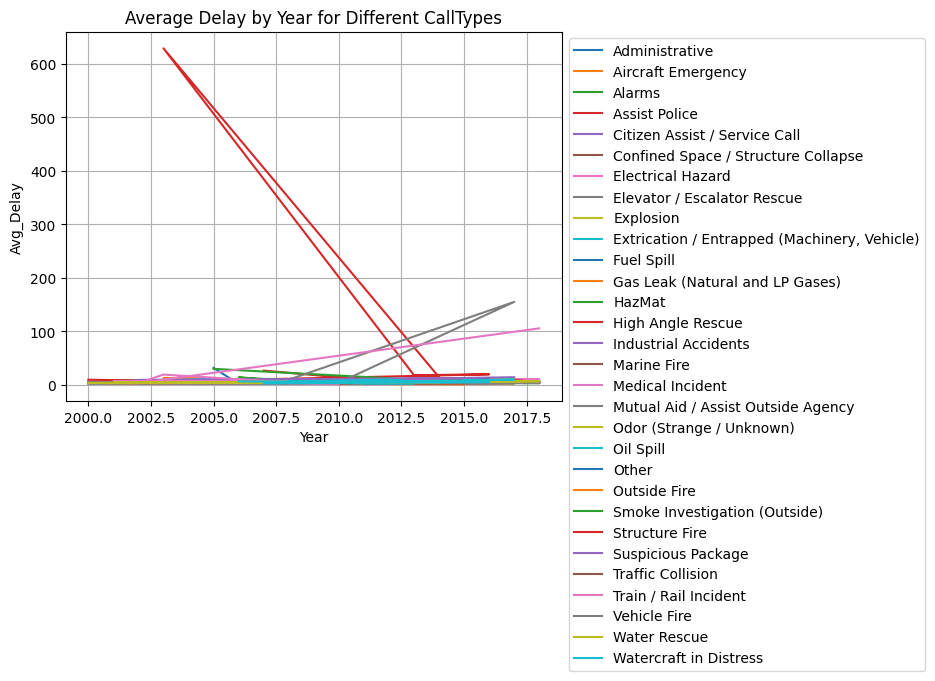

In [29]:
#14.Find out calltype whose average response delay time is maximum, increases, decreases or has no relation over years.
responseDelay = clean_df.select('CallType','Delay','Year').groupBy('CallType','Delay','Year').count()\
  .groupBy('CallType','Year').agg(avg('Delay').alias('Avg_Delay'))
responseDelay.show()
panda_responseDelay = responseDelay.toPandas()

for call_type, group_data in panda_responseDelay.groupby('CallType'):
    plt.plot(group_data['Year'], group_data['Avg_Delay'], label=call_type)
plt.xlabel('Year')
plt.ylabel('Avg_Delay')
plt.title('Average Delay by Year for Different CallTypes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [31]:
# 15.For each year find out which city has more calltypes
grouped_df = clean_df.groupBy('Year', 'City').agg(collect_set('CallType').alias('DistinctCallTypes'))
grouped_df = grouped_df.withColumn('NumDistinctCallTypes', size(col('DistinctCallTypes')))
window_spec = Window.partitionBy('Year').orderBy(col('NumDistinctCallTypes').desc())
ranked_df = grouped_df.withColumn('rank', dense_rank().over(window_spec))
result = ranked_df.filter(col('rank') == 1)
result.select('Year', 'City', 'NumDistinctCallTypes').show()

+----+-------------+--------------------+
|Year|         City|NumDistinctCallTypes|
+----+-------------+--------------------+
|2000|           SF|                  18|
|2001|           SF|                  20|
|2002|           SF|                  20|
|2003|           SF|                  24|
|2004|           SF|                  23|
|2005|           SF|                  26|
|2006|           SF|                  24|
|2007|           SF|                  26|
|2008|           SF|                  23|
|2009|           SF|                  22|
|2010|           SF|                  23|
|2011|           SF|                  25|
|2012|           SF|                  25|
|2013|           SF|                  24|
|2014|SAN FRANCISCO|                  21|
|2014|San Francisco|                  21|
|2015|San Francisco|                  24|
|2016|San Francisco|                  24|
|2017|San Francisco|                  26|
|2018|San Francisco|                  20|
+----+-------------+--------------

In [33]:
# 16.For every year find count of calltypes for 5 cities which has more calls.
from pyspark.sql.window import Window

city_count = clean_df.groupBy('Year','City','CallType').count()
cities = city_count.withColumn('Rank',dense_rank().over(Window.partitionBy('Year').orderBy(col('count').desc()))).filter(col('Rank')<6)
cities.show()

+----+----+--------------------+-----+----+
|Year|City|            CallType|count|Rank|
+----+----+--------------------+-----+----+
|2000|  SF|    Medical Incident| 3399|   1|
|2000|  SF|      Structure Fire| 1002|   2|
|2000|  SF|              Alarms|  620|   3|
|2000|  SF|Citizen Assist / ...|  124|   4|
|2000|  SF|               Other|   99|   5|
|2001|  SF|    Medical Incident| 4619|   1|
|2001|  SF|      Structure Fire| 1542|   2|
|2001|  SF|              Alarms|  868|   3|
|2001|  SF|               Other|  189|   4|
|2001|  SF|Citizen Assist / ...|  122|   5|
|2002|  SF|    Medical Incident| 5022|   1|
|2002|  SF|      Structure Fire| 1571|   2|
|2002|  SF|              Alarms|  827|   3|
|2002|  SF|               Other|  171|   4|
|2002|  SF|Citizen Assist / ...|  140|   5|
|2003|  SF|    Medical Incident| 5026|   1|
|2003|  SF|      Structure Fire| 1540|   2|
|2003|  SF|              Alarms|  950|   3|
|2003|  SF|   Traffic Collision|  319|   4|
|2003|  SF|Citizen Assist / ...|

In [34]:
# 17. Is there a correlation between neighborhood, zip code, and number of fire calls?
#Is there a correlation between neighborhood, zip code, and number of fire calls
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Create a Spark session
aggregated_data = clean_df.groupBy('Neighborhood', 'ZipCode').count()
pivoted_data = aggregated_data.groupBy('Neighborhood').pivot('ZipCode').count().na.fill(0)
assembler = VectorAssembler(inputCols=pivoted_data.columns[1:], outputCol="features")
feature_vector = assembler.transform(pivoted_data)
correlation_matrix = Correlation.corr(feature_vector, "features", method="pearson")
correlation_array = correlation_matrix.collect()[0]["pearson(features)"].toArray()
for i, neighborhood in enumerate(pivoted_data.select('Neighborhood').rdd.map(lambda x: x[0]).collect()):
    for j, zip_code in enumerate(pivoted_data.columns[1:]):
        correlation = correlation_array[i][j]
        print(f"Correlation between {neighborhood} and {zip_code}: {correlation}")

Correlation between Inner Sunset and null: 1.0
Correlation between Inner Sunset and 94102: -0.09128709291752768
Correlation between Inner Sunset and 94103: -0.10846522890932808
Correlation between Inner Sunset and 94104: -0.05
Correlation between Inner Sunset and 94105: -0.05
Correlation between Inner Sunset and 94107: -0.08219949365267865
Correlation between Inner Sunset and 94108: -0.062017367294604234
Correlation between Inner Sunset and 94109: -0.09999999999999998
Correlation between Inner Sunset and 94110: -0.09128709291752768
Correlation between Inner Sunset and 94111: -0.062017367294604234
Correlation between Inner Sunset and 94112: 0.22821773229381923
Correlation between Inner Sunset and 94114: -0.09999999999999998
Correlation between Inner Sunset and 94115: -0.09128709291752768
Correlation between Inner Sunset and 94116: -0.062017367294604234
Correlation between Inner Sunset and 94117: -0.09999999999999998
Correlation between Inner Sunset and 94118: -0.09999999999999998
Correl

IndexError: ignored